<a href="https://colab.research.google.com/github/gauravrawataiml/Ptyhon/blob/main/Python_with_IPL_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
## Adaboost

In [115]:
import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [116]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 7)

In [117]:
pd.read_csv?

In [118]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
%cd /content/drive/MyDrive/
%ls

/content/drive/MyDrive
 Autoencoders_dimension_reduction.ipynb
 bank.csv
 char_prediction.ipynb
'Colab Notebooks'/
 data/
 DeepLearning/
 groceries.csv
 IPL_IMB381IPL2013.csv
 loan_application_mlp_overfitting.ipynb
 Machine_Translation.ipynb
 NLP/
 PCA_dimension_reduction.ipynb
 Tomato_Leaf_Disease_Classification.ipynb
 Untitled0.ipynb
 Untitled1.ipynb


In [120]:
IPL_auction_df = pd.read_csv('IPL_IMB381IPL2013.csv')
IPL_auction_df.head()

,Sl.NO.,PLAYER NAME,AGE,...,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,...,2009,50000,50000
1,2,Abdur Razzak,2,...,2008,50000,50000
2,3,"Agarkar, AB",2,...,2008,200000,350000
3,4,"Ashwin, R",1,...,2011,100000,850000
4,5,"Badrinath, S",2,...,2011,100000,800000


In [121]:
type(IPL_auction_df)

pandas.core.frame.DataFrame

In [122]:
list(IPL_auction_df.columns)

['Sl.NO.',
 'PLAYER NAME',
 'AGE',
 'COUNTRY',
 'TEAM',
 'PLAYING ROLE',
 'T-RUNS',
 'T-WKTS',
 'ODI-RUNS-S',
 'ODI-SR-B',
 'ODI-WKTS',
 'ODI-SR-BL',
 'CAPTAINCY EXP',
 'RUNS-S',
 'HS',
 'AVE',
 'SR-B',
 'SIXERS',
 'RUNS-C',
 'WKTS',
 'AVE-BL',
 'ECON',
 'SR-BL',
 'AUCTION YEAR',
 'BASE PRICE',
 'SOLD PRICE']

In [123]:
IPL_auction_df.head(5).transpose()

,0,1,2,3,4
Sl.NO.,1,2,3,4,5
PLAYER NAME,"Abdulla, YA",Abdur Razzak,"Agarkar, AB","Ashwin, R","Badrinath, S"
AGE,2,2,2,1,2
COUNTRY,SA,BAN,IND,IND,IND
TEAM,KXIP,RCB,KKR,CSK,CSK
PLAYING ROLE,Allrounder,Bowler,Bowler,Bowler,Batsman
T-RUNS,0,214,571,284,63
T-WKTS,0,18,58,31,0
ODI-RUNS-S,0,657,1269,241,79
ODI-SR-B,0.000,71.410,80.620,84.560,45.930


In [124]:
IPL_auction_df.shape

(130, 26)

In [125]:
IPL_auction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [126]:
IPL_auction_df[0:5]

,Sl.NO.,PLAYER NAME,AGE,...,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,...,2009,50000,50000
1,2,Abdur Razzak,2,...,2008,50000,50000
2,3,"Agarkar, AB",2,...,2008,200000,350000
3,4,"Ashwin, R",1,...,2011,100000,850000
4,5,"Badrinath, S",2,...,2011,100000,800000


In [127]:
IPL_auction_df[-5:]

,Sl.NO.,PLAYER NAME,AGE,...,AUCTION YEAR,BASE PRICE,SOLD PRICE
125,126,"Yadav, AS",2,...,2010,50000,750000
126,127,Younis Khan,2,...,2008,225000,225000
127,128,Yuvraj Singh,2,...,2011,400000,1800000
128,129,Zaheer Khan,2,...,2008,200000,450000
129,130,"Zoysa, DNT",2,...,2008,100000,110000


In [128]:
IPL_auction_df['PLAYER NAME'][0:5]

,PLAYER NAME
0,"Abdulla, YA"
1,Abdur Razzak
2,"Agarkar, AB"
3,"Ashwin, R"
4,"Badrinath, S"


In [129]:
IPL_auction_df[['PLAYER NAME', 'COUNTRY']][0:5]

,PLAYER NAME,COUNTRY
0,"Abdulla, YA",SA
1,Abdur Razzak,BAN
2,"Agarkar, AB",IND
3,"Ashwin, R",IND
4,"Badrinath, S",IND


In [130]:
IPL_auction_df.iloc[4:9, 1:4]

,PLAYER NAME,AGE,COUNTRY
4,"Badrinath, S",2,IND
5,"Bailey, GJ",2,AUS
6,"Balaji, L",2,IND
7,"Bollinger, DE",2,AUS
8,"Botha, J",2,SA


In [131]:
IPL_auction_df.COUNTRY.value_counts()

,count
COUNTRY,
IND,53
AUS,22
SA,16
SL,12
PAK,9
NZ,7
WI,6
ENG,3
BAN,1


In [132]:
IPL_auction_df.COUNTRY.value_counts(normalize=True)*100

,proportion
COUNTRY,
IND,40.769
AUS,16.923
SA,12.308
SL,9.231
PAK,6.923
NZ,5.385
WI,4.615
ENG,2.308
BAN,0.769


In [133]:
pd.crosstab(IPL_auction_df['AGE'], IPL_auction_df['PLAYING ROLE'])

PLAYING ROLE,Allrounder,Batsman,Bowler,W. Keeper
AGE,,,,
1,4,5,7,0
2,25,21,29,11
3,6,13,8,1


In [134]:
IPL_auction_df[['PLAYER NAME', 'SOLD PRICE']][0:5].sort_values('SOLD PRICE')

,PLAYER NAME,SOLD PRICE
0,"Abdulla, YA",50000
1,Abdur Razzak,50000
2,"Agarkar, AB",350000
4,"Badrinath, S",800000
3,"Ashwin, R",850000


In [135]:
IPL_auction_df[['PLAYER NAME', 'SOLD PRICE']][0:5].sort_values('SOLD PRICE', ascending = False)

,PLAYER NAME,SOLD PRICE
3,"Ashwin, R",850000
4,"Badrinath, S",800000
2,"Agarkar, AB",350000
0,"Abdulla, YA",50000
1,Abdur Razzak,50000


In [136]:
IPL_auction_df.groupby('AGE')['SOLD PRICE'].mean()

,SOLD PRICE
AGE,
1,720250.000
2,484534.884
3,520178.571


<Axes: xlabel='AGE'>

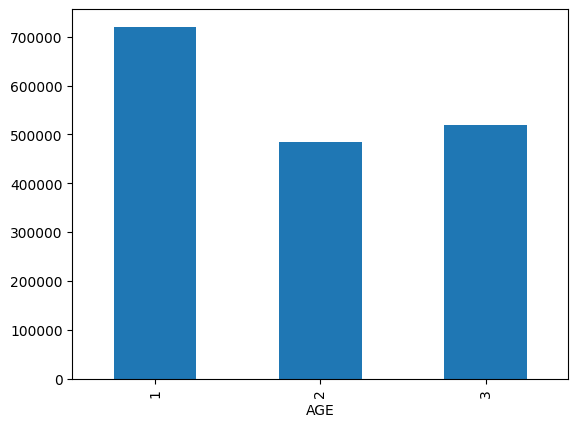

In [137]:
IPL_auction_df.groupby('AGE')['SOLD PRICE'].mean().plot(kind='bar')

In [138]:
sold_price_age = IPL_auction_df.groupby('AGE')['SOLD PRICE'].mean().reset_index()
sold_price_age

,AGE,SOLD PRICE
0,1,720250.000
1,2,484534.884
2,3,520178.571


In [139]:
sold_price_age_role=IPL_auction_df.groupby(['AGE','PLAYING ROLE'])['SOLD PRICE'].mean().reset_index()
sold_price_age_role

,AGE,PLAYING ROLE,SOLD PRICE
0,1,Allrounder,587500.000
1,1,Batsman,1110000.000
2,1,Bowler,517714.286
3,2,Allrounder,449400.000
4,2,Batsman,654761.905
5,2,Bowler,397931.034
6,2,W. Keeper,467727.273
7,3,Allrounder,766666.667
8,3,Batsman,457692.308
9,3,Bowler,414375.000


In [140]:
sold_price_comparison = sold_price_age.merge(sold_price_age_role, on='AGE', how='left')
sold_price_comparison

,AGE,SOLD PRICE_x,PLAYING ROLE,SOLD PRICE_y
0,1,720250.000,Allrounder,587500.000
1,1,720250.000,Batsman,1110000.000
2,1,720250.000,Bowler,517714.286
3,2,484534.884,Allrounder,449400.000
4,2,484534.884,Batsman,654761.905
5,2,484534.884,Bowler,397931.034
6,2,484534.884,W. Keeper,467727.273
7,3,520178.571,Allrounder,766666.667
8,3,520178.571,Batsman,457692.308
9,3,520178.571,Bowler,414375.000


In [141]:
sold_price_comparison.rename(columns={'SOLD PRICE_x':'SOLD_PRICE_AGE_AVG','SOLD PRICE_y':'SOLD_PRICE_AGE_ROLE_AVG'},inplace=True)
sold_price_comparison

,AGE,SOLD_PRICE_AGE_AVG,PLAYING ROLE,SOLD_PRICE_AGE_ROLE_AVG
0,1,720250.000,Allrounder,587500.000
1,1,720250.000,Batsman,1110000.000
2,1,720250.000,Bowler,517714.286
3,2,484534.884,Allrounder,449400.000
4,2,484534.884,Batsman,654761.905
5,2,484534.884,Bowler,397931.034
6,2,484534.884,W. Keeper,467727.273
7,3,520178.571,Allrounder,766666.667
8,3,520178.571,Batsman,457692.308
9,3,520178.571,Bowler,414375.000


In [142]:
sold_price_comparison['change']=sold_price_comparison['SOLD_PRICE_AGE_ROLE_AVG']-sold_price_comparison['SOLD_PRICE_AGE_AVG']
sold_price_comparison

,AGE,SOLD_PRICE_AGE_AVG,PLAYING ROLE,SOLD_PRICE_AGE_ROLE_AVG,change
0,1,720250.000,Allrounder,587500.000,-132750.000
1,1,720250.000,Batsman,1110000.000,389750.000
2,1,720250.000,Bowler,517714.286,-202535.714
3,2,484534.884,Allrounder,449400.000,-35134.884
4,2,484534.884,Batsman,654761.905,170227.021
5,2,484534.884,Bowler,397931.034,-86603.849
6,2,484534.884,W. Keeper,467727.273,-16807.611
7,3,520178.571,Allrounder,766666.667,246488.095
8,3,520178.571,Batsman,457692.308,-62486.264
9,3,520178.571,Bowler,414375.000,-105803.571


In [143]:
sold_price_comparison['change%']=(sold_price_comparison['SOLD_PRICE_AGE_ROLE_AVG']-sold_price_comparison['SOLD_PRICE_AGE_AVG'])/sold_price_comparison['SOLD_PRICE_AGE_AVG']

In [144]:
sold_price_comparison

,AGE,SOLD_PRICE_AGE_AVG,PLAYING ROLE,SOLD_PRICE_AGE_ROLE_AVG,change,change%
0,1,720250.000,Allrounder,587500.000,-132750.000,-0.184
1,1,720250.000,Batsman,1110000.000,389750.000,0.541
2,1,720250.000,Bowler,517714.286,-202535.714,-0.281
3,2,484534.884,Allrounder,449400.000,-35134.884,-0.073
4,2,484534.884,Batsman,654761.905,170227.021,0.351
5,2,484534.884,Bowler,397931.034,-86603.849,-0.179
6,2,484534.884,W. Keeper,467727.273,-16807.611,-0.035
7,3,520178.571,Allrounder,766666.667,246488.095,0.474
8,3,520178.571,Batsman,457692.308,-62486.264,-0.120
9,3,520178.571,Bowler,414375.000,-105803.571,-0.203


In [145]:
sold_price_comparison['change%']= sold_price_comparison.apply(lambda rec: (rec.SOLD_PRICE_AGE_ROLE_AVG-rec.SOLD_PRICE_AGE_AVG)/rec.SOLD_PRICE_AGE_AVG,axis=1)

In [146]:
sold_price_comparison

,AGE,SOLD_PRICE_AGE_AVG,PLAYING ROLE,SOLD_PRICE_AGE_ROLE_AVG,change,change%
0,1,720250.000,Allrounder,587500.000,-132750.000,-0.184
1,1,720250.000,Batsman,1110000.000,389750.000,0.541
2,1,720250.000,Bowler,517714.286,-202535.714,-0.281
3,2,484534.884,Allrounder,449400.000,-35134.884,-0.073
4,2,484534.884,Batsman,654761.905,170227.021,0.351
5,2,484534.884,Bowler,397931.034,-86603.849,-0.179
6,2,484534.884,W. Keeper,467727.273,-16807.611,-0.035
7,3,520178.571,Allrounder,766666.667,246488.095,0.474
8,3,520178.571,Batsman,457692.308,-62486.264,-0.120
9,3,520178.571,Bowler,414375.000,-105803.571,-0.203


In [147]:
IPL_auction_df[IPL_auction_df['SIXERS'] > 80][['PLAYER NAME', 'SIXERS']]

,PLAYER NAME,SIXERS
26,"Gayle, CH",129
28,"Gilchrist, AC",86
82,"Pathan, YK",81
88,"Raina, SK",97
97,"Sharma, RG",82


In [148]:
IPL_auction_df.drop('Sl.NO.', inplace=True, axis=1)

In [149]:
IPL_auction_df


,PLAYER NAME,AGE,COUNTRY,...,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,"Abdulla, YA",2,SA,...,2009,50000,50000
1,Abdur Razzak,2,BAN,...,2008,50000,50000
2,"Agarkar, AB",2,IND,...,2008,200000,350000
3,"Ashwin, R",1,IND,...,2011,100000,850000
4,"Badrinath, S",2,IND,...,2011,100000,800000
...,...,...,...,...,...,...,...
125,"Yadav, AS",2,IND,...,2010,50000,750000
126,Younis Khan,2,PAK,...,2008,225000,225000
127,Yuvraj Singh,2,IND,...,2011,400000,1800000
128,Zaheer Khan,2,IND,...,2008,200000,450000


In [150]:
import matplotlib.pyplot as plt
import seaborn as sn

<Axes: xlabel='AGE', ylabel='SOLD PRICE'>

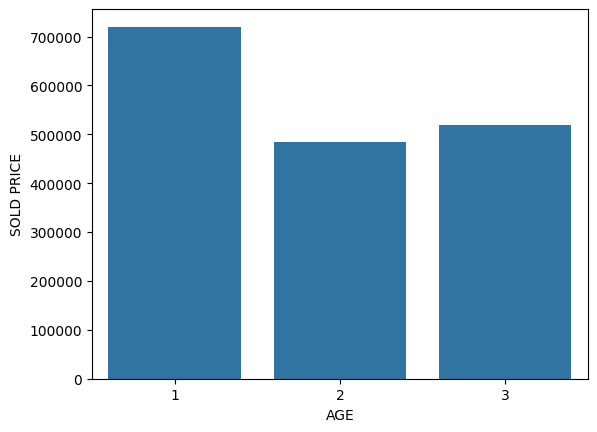

In [151]:
sn.barplot(x='AGE', y='SOLD PRICE', data=sold_price_age)

<Axes: xlabel='AGE', ylabel='SOLD_PRICE_AGE_ROLE_AVG'>

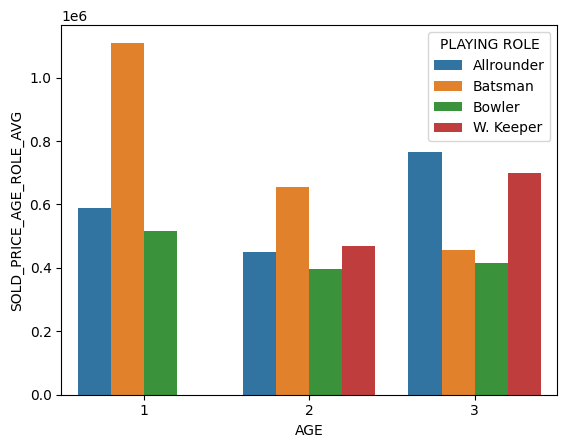

In [152]:
sn.barplot(x='AGE', y='SOLD_PRICE_AGE_ROLE_AVG',hue = 'PLAYING ROLE', data=sold_price_comparison)

Text(0.5, 1.0, 'SOLD PRICE DISTRIBUTION')

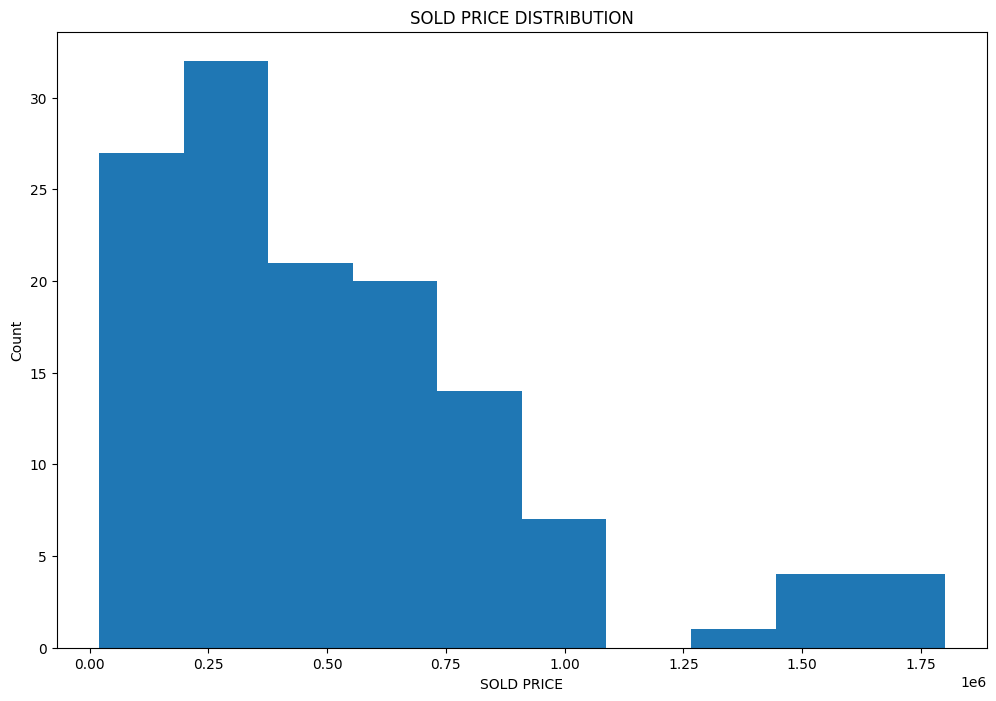

In [153]:
plt.figure(figsize=(12,8))
plt.hist(IPL_auction_df['SOLD PRICE']);
plt.xlabel('SOLD PRICE')
plt.ylabel('Count')
plt.title('SOLD PRICE DISTRIBUTION')

Text(0.5, 1.0, 'SOLD PRICE DISTRIBUTION')

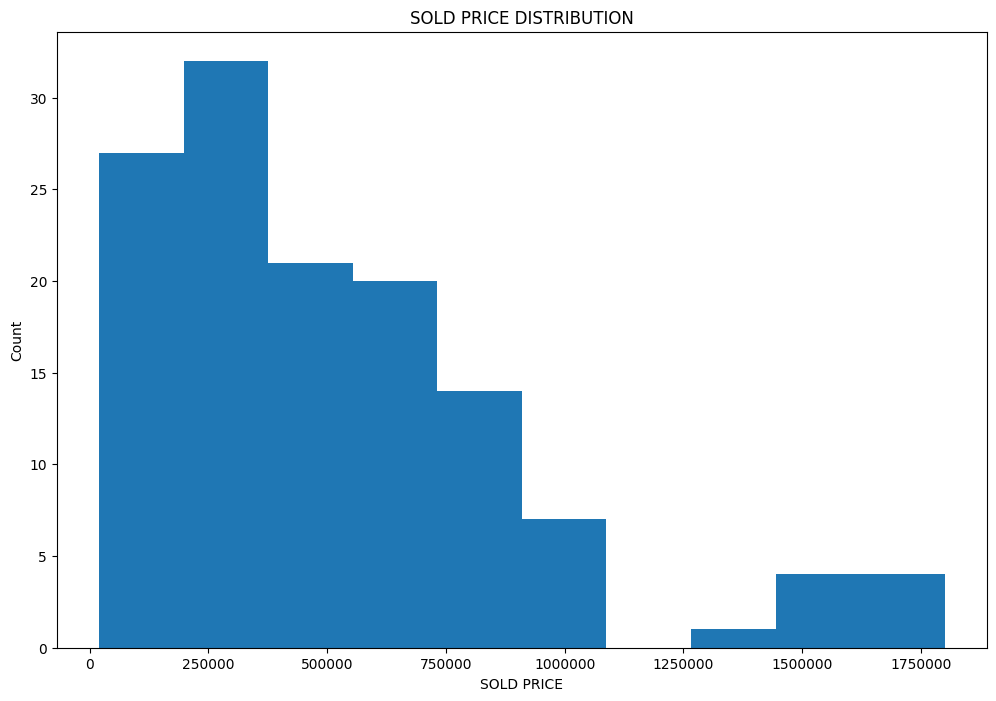

In [154]:
plt.figure(figsize=(12,8))
ax=plt.gca()
ax.xaxis.get_major_formatter().set_scientific(False)
plt.hist(IPL_auction_df['SOLD PRICE']);
plt.xlabel('SOLD PRICE')
plt.ylabel('Count')
plt.title('SOLD PRICE DISTRIBUTION')

<Axes: xlabel='SOLD PRICE', ylabel='Density'>

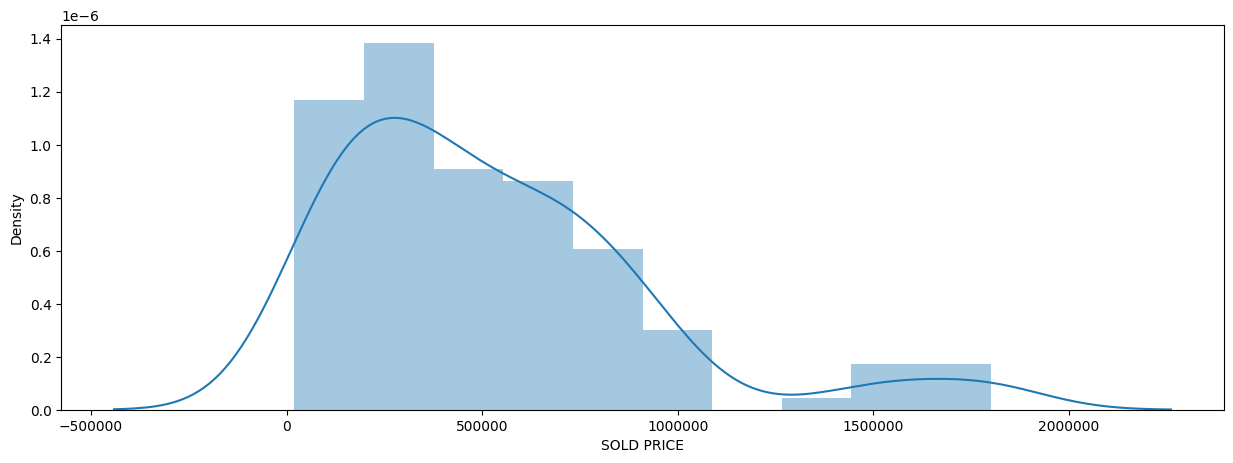

In [155]:
plt.figure(figsize=(15,5))
ax=plt.gca()
ax.xaxis.get_major_formatter().set_scientific(False)
sn.distplot(IPL_auction_df['SOLD PRICE'])

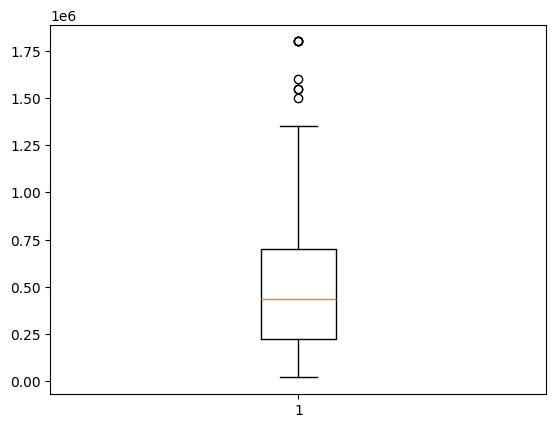

In [156]:
box=plt.boxplot(IPL_auction_df['SOLD PRICE'])

In [157]:
[item.get_ydata()[0] for item in box['medians']]

[np.float64(437500.0)]

In [158]:
[item.get_ydata()[0] for item in box['caps']]

[np.int64(20000), np.int64(1350000)]

In [159]:
[item.get_ydata()[0] for item in box['whiskers']]

[np.float64(225000.0), np.float64(700000.0)]

In [160]:
#Outliers
IPL_auction_df[IPL_auction_df['SOLD PRICE'] > 1350000.0][['PLAYER NAME','PLAYING ROLE','SOLD PRICE']]

,PLAYER NAME,PLAYING ROLE,SOLD PRICE
15,"Dhoni, MS",W. Keeper,1500000
23,"Flintoff, A",Allrounder,1550000
50,"Kohli, V",Batsman,1800000
83,"Pietersen, KP",Batsman,1550000
93,"Sehwag, V",Batsman,1800000
111,"Tendulkar, SR",Batsman,1800000
113,"Tiwary, SS",Batsman,1600000
127,Yuvraj Singh,Batsman,1800000


<Figure size 1500x500 with 0 Axes>

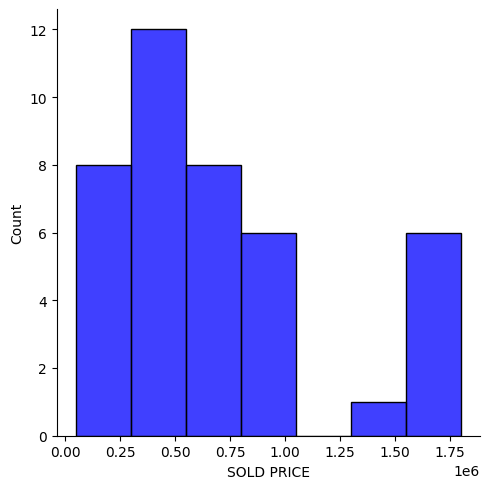

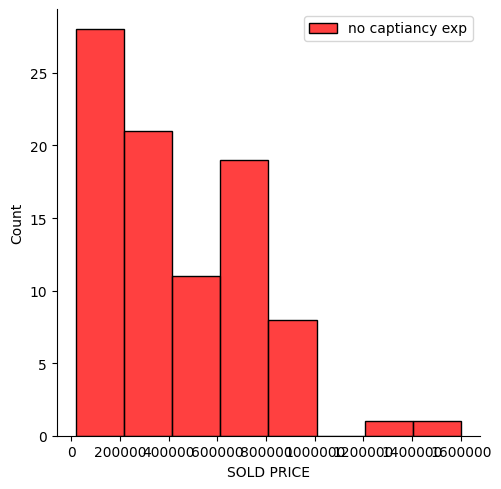

In [161]:
plt.figure(figsize=(15,5))
sn.displot(IPL_auction_df[IPL_auction_df['CAPTAINCY EXP'] == 1]['SOLD PRICE'],
           color = 'b',
           label = 'captiancy exp')
sn.displot(IPL_auction_df[IPL_auction_df['CAPTAINCY EXP'] == 0]['SOLD PRICE'],
           color = 'r',
           label = 'no captiancy exp')
ax = plt.gca()
ax.xaxis.get_major_formatter().set_scientific(False)
plt.legend();

<Axes: xlabel='PLAYING ROLE', ylabel='SOLD PRICE'>

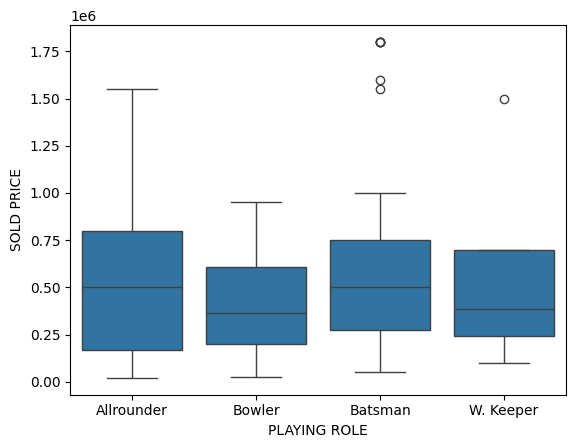

In [162]:
sn.boxplot(x='PLAYING ROLE', y='SOLD PRICE', data=IPL_auction_df)

In [163]:
IPL_batsman_df = IPL_auction_df[IPL_auction_df['PLAYING ROLE'] == 'Batsman']

Text(0.5, 1.0, 'SOLD PRICE VS SIXERS')

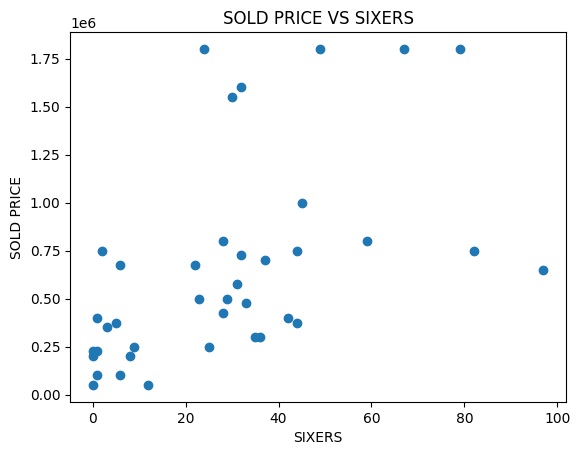

In [164]:
plt.scatter(x = IPL_batsman_df.SIXERS,
            y = IPL_batsman_df['SOLD PRICE'])
plt.xlabel('SIXERS')
plt.ylabel('SOLD PRICE')
plt.title('SOLD PRICE VS SIXERS')

<Axes: xlabel='SIXERS', ylabel='SOLD PRICE'>

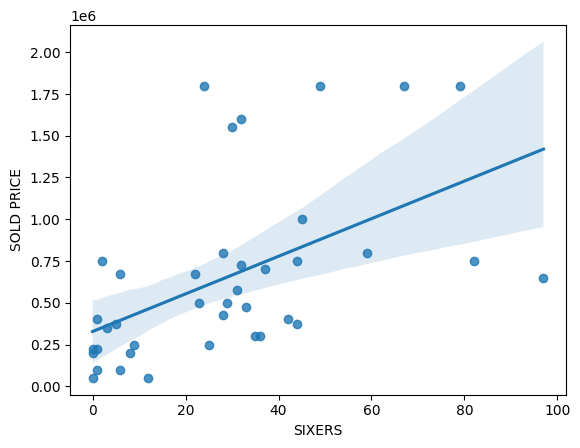

In [165]:
sn.regplot(x='SIXERS', y='SOLD PRICE', data=IPL_batsman_df)

In [166]:
Influential_features = ['SR-B', 'AVE', 'SIXERS', 'SOLD PRICE']

In [167]:
IPL_auction_df[Influential_features].corr()

,SR-B,AVE,SIXERS,SOLD PRICE
SR-B,1.000,0.584,0.425,0.184
AVE,0.584,1.000,0.705,0.397
SIXERS,0.425,0.705,1.000,0.451
SOLD PRICE,0.184,0.397,0.451,1.000


<Axes: >

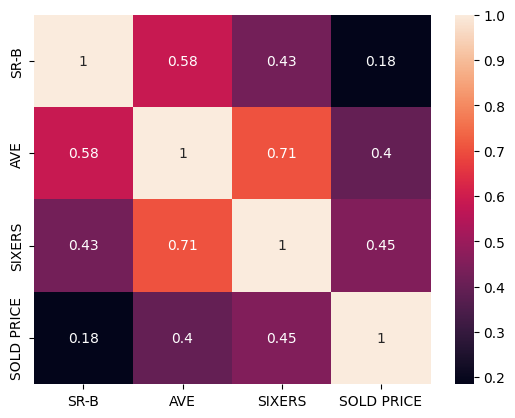

In [168]:
sn.heatmap(IPL_auction_df[Influential_features].corr(), annot=True)